# 2023年　東京地下鉄・都営　の　通勤・観光　Top10

[source website](https://spec.api.metro.tokyo.lg.jp/spec/t000003d2000001015-901c428b7b15e1151e52ae2a6b8f7312-0) | [csv data file](https://www.toukei.metro.tokyo.lg.jp/tnenkan/2023/tn23qv041500.csv)

手法：
- データ取得：東京都統計年鑑　令和5年　4　運輸 4-15　地下鉄の駅別乗降車人員（Tokyo Open Data API）
- データ加工：Pandas
- 分析：定期券利用者数と普通乗車券利用者数の割合を計算し、Top10を抽出
- 可視化：Matplotlibを使用してグラフ化
- 目的：通勤利用が多い駅と観光利用が多い駅を特定し、利用傾向を把握する
- 結果：定期券利用率Top10駅と普通乗車券利用率Top10駅をグラフで表示

ライセンス：CC BY 4.0

In [1]:
import requests

url = "https://www.toukei.metro.tokyo.lg.jp/tnenkan/2023/tn23qv041500.csv"
response = requests.get(url)
if response.status_code != 200:
    raise Exception("Failed to download file")
with open("tn23qv041500.csv", "wb") as f:
    f.write(response.content)

In [2]:
import pandas as pd
df = pd.read_csv("tn23qv041500.csv", encoding="utf-8")
df

,年度,Fiscal year,会社名,Company name,系統,Line,駅,Station,マーク Mark,乗車人員 Boarding passengers／総数 Total,乗車人員 Boarding passengers／定期 Commuter Pass,乗車人員 Boarding passengers／普通 Tickets,降車人員 Deboarding passengers／総数 Total,降車人員 Deboarding passengers／定期 Commuter Pass,降車人員 Deboarding passengers／普通 Tickets,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,令和元,2019.0,総数,Total,NaN,NaN,NaN,NaN,NaN,3789500.0,2208955.0,1580545.0,3789399.0,2208953.0,1580446.0,NaN,NaN,NaN,NaN
1,令和2,2020.0,総数,Total,NaN,NaN,NaN,NaN,NaN,2496030.0,1558916.0,937113.0,2495994.0,1558916.0,937077.0,NaN,NaN,NaN,NaN
2,令和3,2021.0,総数,Total,NaN,NaN,NaN,NaN,NaN,2613399.0,1492092.0,1121307.0,2613871.0,1492092.0,1121779.0,NaN,NaN,NaN,NaN
3,令和4,2022.0,総数,Total,NaN,NaN,NaN,NaN,NaN,2972260.0,1608997.0,1363262.0,2972910.0,1608997.0,1363912.0,NaN,NaN,NaN,NaN
4,令和5,2023.0,総数,Total,NaN,NaN,NaN,NaN,NaN,3283049.0,1723838.0,1559211.0,3283545.0,1723838.0,1559707.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,4-15 地下鉄の駅別乗降車人員 (令和元～5年度） 4-15 NUMBER OF PAS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,各駅の乗降車人員は最新年度1年間の合計である。同一会社内の乗り継ぎは除く（但し，都営地下鉄内...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,The number of boarding and deboarding passenge...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,資料：東京地下鉄株式会社鉄道本部営業部審査課，都交通局総務部企画調整課 Source: To...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.rename(columns={
    "乗車人員 Boarding passengers／総数 Total": "乗車総数",
    "乗車人員 Boarding passengers／定期 Commuter Pass": "乗車定期",
    "乗車人員 Boarding passengers／普通 Tickets": "乗車普通",
    "降車人員 Deboarding passengers／総数 Total": "降車総数",
    "降車人員 Deboarding passengers／定期 Commuter Pass": "降車定期",
    "降車人員 Deboarding passengers／普通 Tickets": "降車普通",
})

current_data = df.loc[df["系統"].notna() & df["駅"].notna(), ["系統", "駅", "乗車総数", "乗車定期", "乗車普通", "降車総数", "降車定期", "降車普通"]]
current_data

,系統,駅,乗車総数,乗車定期,乗車普通,降車総数,降車定期,降車普通
7,銀座線,渋谷,33181.0,13657.0,19524.0,32570.0,13657.0,18913.0
8,銀座線,表参道,10599.0,3263.0,7336.0,11171.0,3263.0,7908.0
9,銀座線,外苑前,12733.0,5425.0,7308.0,13769.0,5425.0,8344.0
10,銀座線,青山一丁目,7959.0,3247.0,4712.0,7935.0,3247.0,4688.0
11,銀座線,赤坂見附,7583.0,3536.0,4047.0,7486.0,3536.0,3950.0
...,...,...,...,...,...,...,...,...
293,大江戸線,新江古田,5112.0,3082.0,2031.0,5020.0,3082.0,1939.0
294,大江戸線,練馬,13667.0,7975.0,5691.0,13571.0,7975.0,5596.0
295,大江戸線,豊島園,2479.0,1169.0,1309.0,2472.0,1169.0,1302.0
296,大江戸線,練馬春日町,3991.0,2454.0,1537.0,3952.0,2454.0,1497.0


In [4]:
def total_pass(row):
    return row["乗車定期"] + row["降車定期"]
def total_tickets(row):
    return row["乗車普通"] + row["降車普通"]
def total_all(row):
    return row["乗車総数"] + row["降車総数"]

In [5]:
new_df = current_data.copy()
new_df["定期合計"] = new_df.apply(total_pass, axis=1)
new_df["普通合計"] = new_df.apply(total_tickets, axis=1)
new_df["総合計"] = new_df.apply(total_all, axis=1)
new_df

,系統,駅,乗車総数,乗車定期,乗車普通,降車総数,降車定期,降車普通,定期合計,普通合計,総合計
7,銀座線,渋谷,33181.0,13657.0,19524.0,32570.0,13657.0,18913.0,27314.0,38437.0,65751.0
8,銀座線,表参道,10599.0,3263.0,7336.0,11171.0,3263.0,7908.0,6526.0,15244.0,21770.0
9,銀座線,外苑前,12733.0,5425.0,7308.0,13769.0,5425.0,8344.0,10850.0,15652.0,26502.0
10,銀座線,青山一丁目,7959.0,3247.0,4712.0,7935.0,3247.0,4688.0,6494.0,9400.0,15894.0
11,銀座線,赤坂見附,7583.0,3536.0,4047.0,7486.0,3536.0,3950.0,7072.0,7997.0,15069.0
...,...,...,...,...,...,...,...,...,...,...,...
293,大江戸線,新江古田,5112.0,3082.0,2031.0,5020.0,3082.0,1939.0,6164.0,3970.0,10132.0
294,大江戸線,練馬,13667.0,7975.0,5691.0,13571.0,7975.0,5596.0,15950.0,11287.0,27238.0
295,大江戸線,豊島園,2479.0,1169.0,1309.0,2472.0,1169.0,1302.0,2338.0,2611.0,4951.0
296,大江戸線,練馬春日町,3991.0,2454.0,1537.0,3952.0,2454.0,1497.0,4908.0,3034.0,7943.0


In [6]:
def commuting_rate(row):
    if row["総合計"] == 0:
        return 0
    return row["定期合計"] / row["総合計"] * 100
def ticket_rate(row):
    if row["総合計"] == 0:
        return 0
    return row["普通合計"] / row["総合計"] * 100

new_df["定期率"] = new_df.apply(commuting_rate, axis=1)
new_df["普通率"] = new_df.apply(ticket_rate, axis=1)
new_df

,系統,駅,乗車総数,乗車定期,乗車普通,降車総数,降車定期,降車普通,定期合計,普通合計,総合計,定期率,普通率
7,銀座線,渋谷,33181.0,13657.0,19524.0,32570.0,13657.0,18913.0,27314.0,38437.0,65751.0,41.541574,58.458426
8,銀座線,表参道,10599.0,3263.0,7336.0,11171.0,3263.0,7908.0,6526.0,15244.0,21770.0,29.977033,70.022967
9,銀座線,外苑前,12733.0,5425.0,7308.0,13769.0,5425.0,8344.0,10850.0,15652.0,26502.0,40.940306,59.059694
10,銀座線,青山一丁目,7959.0,3247.0,4712.0,7935.0,3247.0,4688.0,6494.0,9400.0,15894.0,40.858185,59.141815
11,銀座線,赤坂見附,7583.0,3536.0,4047.0,7486.0,3536.0,3950.0,7072.0,7997.0,15069.0,46.930785,53.069215
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,大江戸線,新江古田,5112.0,3082.0,2031.0,5020.0,3082.0,1939.0,6164.0,3970.0,10132.0,60.836952,39.182787
294,大江戸線,練馬,13667.0,7975.0,5691.0,13571.0,7975.0,5596.0,15950.0,11287.0,27238.0,58.557897,41.438432
295,大江戸線,豊島園,2479.0,1169.0,1309.0,2472.0,1169.0,1302.0,2338.0,2611.0,4951.0,47.222783,52.736821
296,大江戸線,練馬春日町,3991.0,2454.0,1537.0,3952.0,2454.0,1497.0,4908.0,3034.0,7943.0,61.790256,38.197155


---
# 通勤・観光　Top10

In [7]:
# 定期率Top10
top10_commuting = new_df.sort_values(by="定期率", ascending=False).head(10)
top10_commuting

,系統,駅,乗車総数,乗車定期,乗車普通,降車総数,降車定期,降車普通,定期合計,普通合計,総合計,定期率,普通率
109,千代田線,霞ケ関,8627.0,6517.0,2110.0,8715.0,6517.0,2198.0,13034.0,4308.0,17342.0,75.158575,24.841425
37,丸ノ内線,霞ケ関,10597.0,7703.0,2894.0,10440.0,7703.0,2737.0,15406.0,5631.0,21037.0,73.232875,26.767125
98,千代田線,綾瀬,67960.0,49219.0,18741.0,68420.0,49219.0,19201.0,98438.0,37942.0,136380.0,72.179205,27.820795
175,南北線,赤羽岩淵,16443.0,11680.0,4763.0,16167.0,11680.0,4487.0,23360.0,9250.0,32610.0,71.634468,28.365532
223,三田線,白山,8364.0,5891.0,2473.0,8262.0,5891.0,2371.0,11782.0,4844.0,16626.0,70.864910,29.135090
133,有楽町線,桜田門,2403.0,1688.0,715.0,2364.0,1688.0,676.0,3376.0,1391.0,4767.0,70.820222,29.179778
237,三田線,西高島平,2279.0,1579.0,700.0,2197.0,1579.0,618.0,3158.0,1318.0,4476.0,70.554066,29.445934
236,三田線,新高島平,1671.0,1167.0,503.0,1639.0,1167.0,472.0,2334.0,975.0,3310.0,70.513595,29.456193
178,副都心線,千川,3349.0,2355.0,994.0,3345.0,2355.0,990.0,4710.0,1984.0,6694.0,70.361518,29.638482
71,日比谷線,霞ケ関,4343.0,3014.0,1329.0,4328.0,3014.0,1314.0,6028.0,2643.0,8671.0,69.519087,30.480913


In [8]:
# 普通率Top10
top10_ticket = new_df.sort_values(by="普通率", ascending=False).head(10)
top10_ticket

,系統,駅,乗車総数,乗車定期,乗車普通,降車総数,降車定期,降車普通,定期合計,普通合計,総合計,定期率,普通率
43,丸ノ内線,新宿三丁目,14463.0,2733.0,11730.0,14402.0,2733.0,11669.0,5466.0,23399.0,28865.0,18.936428,81.063572
21,銀座線,上野広小路,4294.0,917.0,3377.0,4414.0,917.0,3497.0,1834.0,6874.0,8708.0,21.061093,78.938907
114,千代田線,明治神宮前（原宿）,13040.0,3411.0,9629.0,12803.0,3411.0,9392.0,6822.0,19021.0,25843.0,26.397864,73.602136
25,銀座線,浅草,18605.0,5515.0,13090.0,18699.0,5515.0,13184.0,11030.0,26274.0,37304.0,29.567875,70.432125
8,銀座線,表参道,10599.0,3263.0,7336.0,11171.0,3263.0,7908.0,6526.0,15244.0,21770.0,29.977033,70.022967
20,銀座線,末広町,4485.0,1359.0,3126.0,4519.0,1359.0,3160.0,2718.0,6286.0,9004.0,30.186584,69.813416
284,大江戸線,国立競技場,2324.0,713.0,1611.0,2348.0,713.0,1635.0,1426.0,3246.0,4672.0,30.522260,69.477740
24,銀座線,田原町,6067.0,1880.0,4187.0,6117.0,1880.0,4237.0,3760.0,8424.0,12184.0,30.860144,69.139856
15,銀座線,銀座,13953.0,4430.0,9523.0,14647.0,4430.0,10217.0,8860.0,19740.0,28600.0,30.979021,69.020979
207,浅草線,浅草,9444.0,3224.0,6220.0,11096.0,3224.0,7872.0,6448.0,14092.0,20540.0,31.392405,68.607595


In [9]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Hiragino Sans'


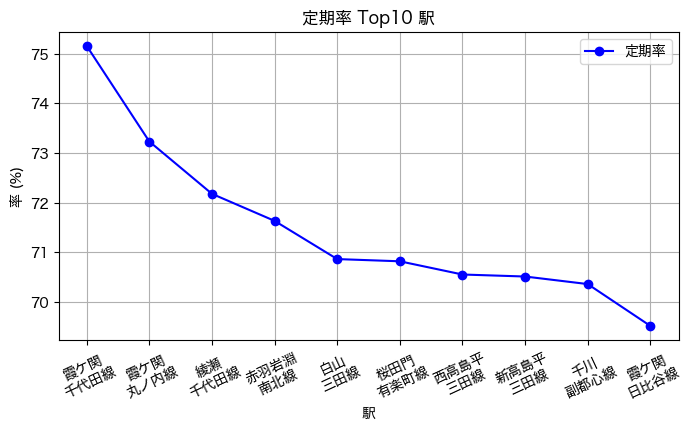

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(top10_commuting["駅"] + "\n" + top10_commuting["系統"], top10_commuting["定期率"], marker='o', color="blue")
# plt.plot(top10_commuting["駅"] + "\n" + top10_commuting["系統"], top10_commuting["普通率"], marker='o', color="red")
plt.xlabel("駅")
plt.ylabel("率 (%)")
plt.title("定期率 Top10 駅")
plt.xticks(rotation=25)
plt.legend(["定期率", "普通率"])
plt.grid()
plt.show()

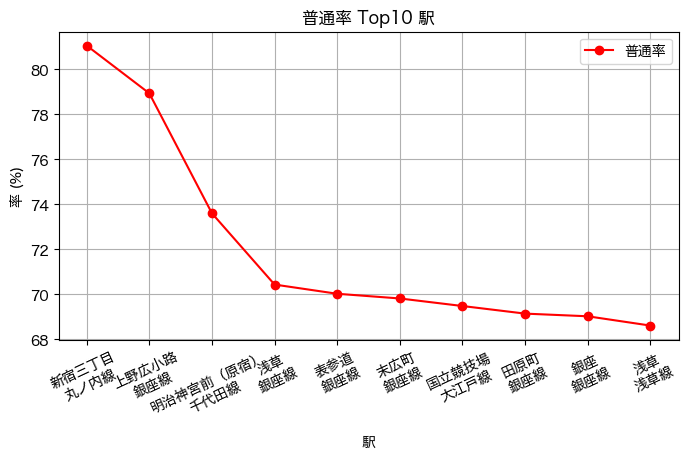

In [11]:
plt.figure(figsize=(8, 4))
plt.plot(top10_ticket["駅"] + "\n" + top10_ticket["系統"], top10_ticket["普通率"], marker='o', color="red")
# plt.plot(top10_ticket["駅"] + "\n" + top10_ticket["系統"], top10_ticket["定期率"], marker='o', color="blue")
plt.xlabel("駅")
plt.ylabel("率 (%)")
plt.title("普通率 Top10 駅")
plt.xticks(rotation=25)
plt.legend(["普通率", "定期率"])
plt.grid()
plt.show()

---
# 考察

定期率 Top10 駅の中で
   - 霞ケ関の周辺がたくさん大手企業や官公庁が集まっているため、通勤利用が多いと考えられる。
   - 綾瀬と赤羽岩淵は、住宅地が多く、通勤利用が多いと考えられる。

普通率 Top10 駅の中で
   - ほぼ全体は観光地として有名であり、観光利用が多いと考えられる。